## Credit card Fraud Detection (Using LR, RF & XGBoost Models)

### Let's import necessary libraries first

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import time

### Now let's load our dataset 

In [2]:
df=pd.read_csv('creditcard.csv')
df.head()
df.shape

(284807, 31)

In [3]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

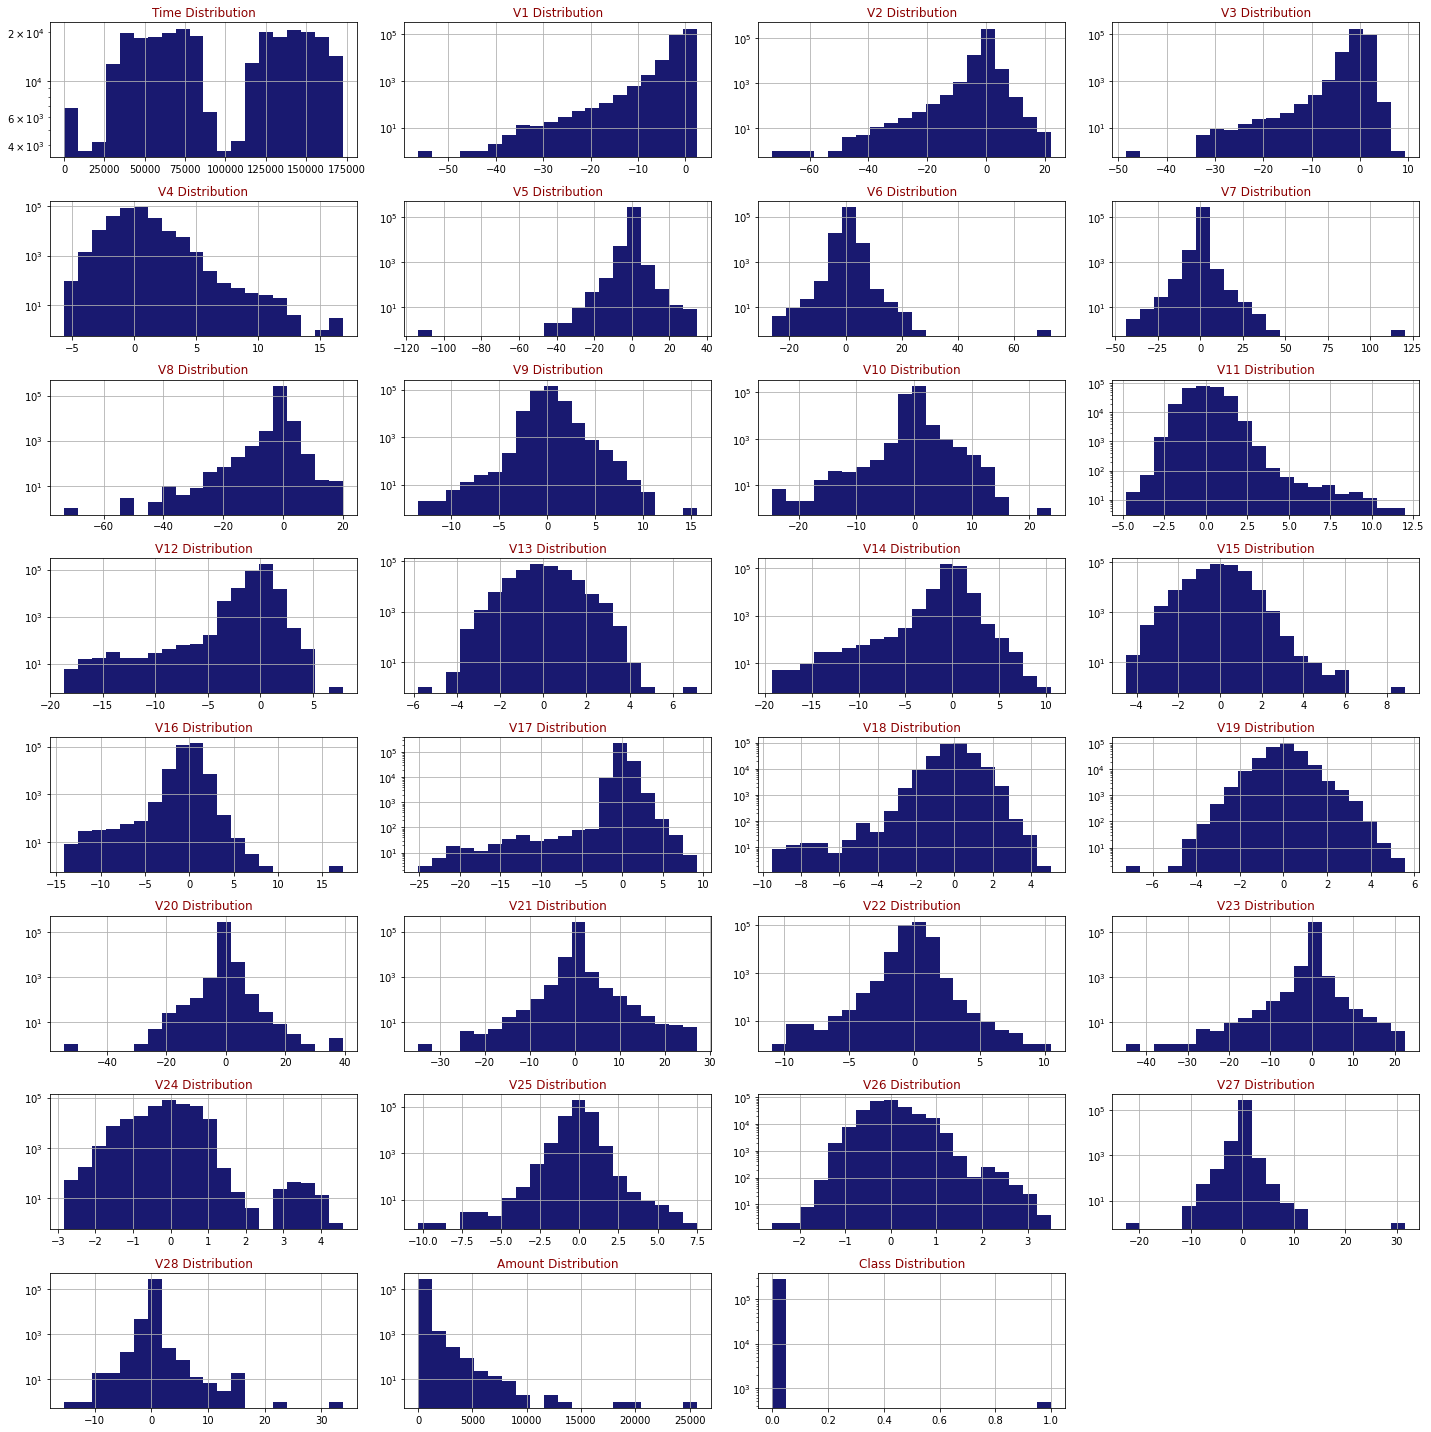

In [4]:
# This is a function to draw histogram of our dataset
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

# This is a function to draw the ROC Curve of each model
def draw_roc_curve(model, x_train_roc, y_train_roc, label = None):
    y_scores = cross_val_predict(model, x_train_roc, y_train_roc, cv=3,method="decision_function")
    fpr, tpr, thresholds = roc_curve(y_train_roc, y_scores)
    plt.figure(figsize=(8, 6)) 
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)    
    plt.grid(True)  
    
def draw_roc_curve_RF(model, x_test_roc, y_test_roc, label = None):
    y_scores = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test_roc, y_scores[:,1])
    plt.figure(figsize=(8, 6)) 
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)    
    plt.grid(True)  


draw_histograms(df,df.columns,8,4)

We will now divide our feature and target dataset

In [5]:
X=df.drop("Class",axis=1)
y=df.Class

## Logistic Regression

### We will now train our dataset using Logistic Regression

In [6]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75)

In [8]:
classifier_LR = GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
classifier_LR.fit(X_train,y_train)

c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.83476217        nan 0.84079593        nan 0.8350845
        nan 0.83923939        nan 0.85029848]
  warnings.warn(
c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [9]:
y_pred=classifier_LR.predict(X_test)

We will draw the confusion matrix table to see how good our model performed

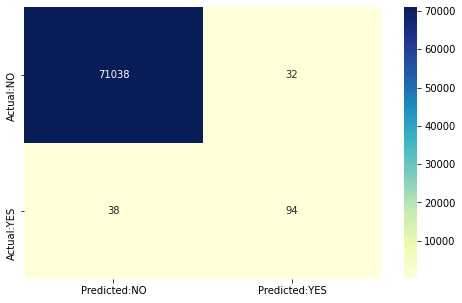

In [10]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:NO','Predicted:YES'],index=['Actual:NO','Actual:YES'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [11]:
print(accuracy_score(y_test,y_pred))

0.9990168815482711


In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.75      0.71      0.73       132

    accuracy                           1.00     71202
   macro avg       0.87      0.86      0.86     71202
weighted avg       1.00      1.00      1.00     71202



c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.83083869        nan 0.83002812        nan 0.84507644
        nan 0.82757601        nan 0.8368074 ]
  warnings.warn(
c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.84069934        nan 0.8545712         nan 0.85758508
        nan 0.85599114        nan 0.85457688]
  warnings.warn(
c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternati

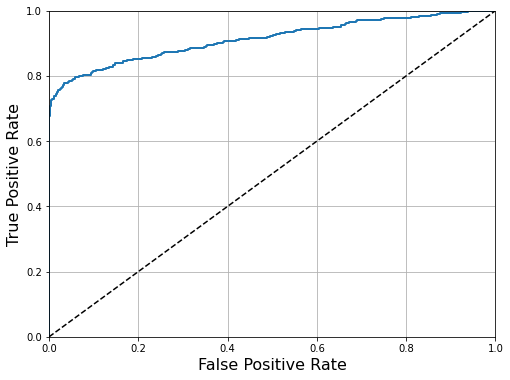

In [13]:
draw_roc_curve(classifier_LR, X_train, y_train, label = None)

## Random Forest Classifier 

### We will now train our dataset with Random Forest Classifier

In [14]:

classifier_RF = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=1)
classifier_RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5)

In [15]:
y_pred=classifier_RF.predict(X_test)

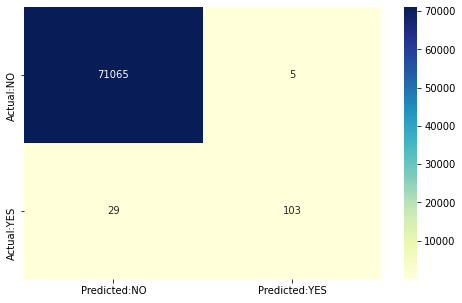

In [16]:

cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:NO','Predicted:YES'],index=['Actual:NO','Actual:YES'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [17]:
print(accuracy_score(y_test,y_pred))

0.999522485323446


In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.95      0.78      0.86       132

    accuracy                           1.00     71202
   macro avg       0.98      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202



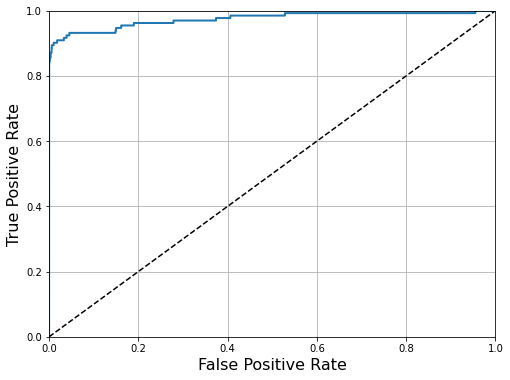

In [19]:
draw_roc_curve_RF(classifier_RF, X_test, y_test, label = None)

## XGBoost

### We will now train our dataset with XGBoost classifier

In [20]:
classifier_XG = XGBClassifier()
classifier_XG.fit(X_train,y_train)

c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:21:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
y_pred=classifier_XG.predict(X_test)

c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


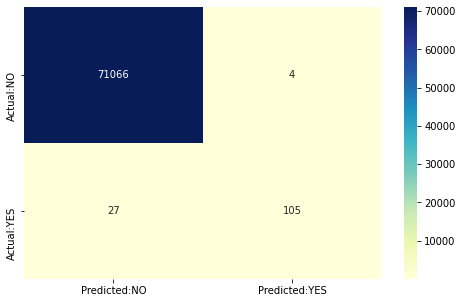

In [22]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:NO','Predicted:YES'],index=['Actual:NO','Actual:YES'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [23]:
print(accuracy_score(y_test,y_pred))

0.9995646189713772


In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.96      0.80      0.87       132

    accuracy                           1.00     71202
   macro avg       0.98      0.90      0.94     71202
weighted avg       1.00      1.00      1.00     71202



c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


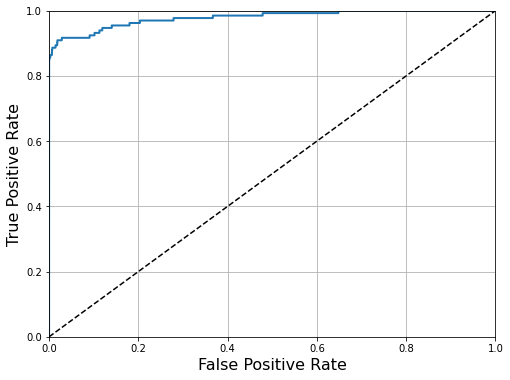

In [25]:
draw_roc_curve_RF(classifier_XG, X_test, y_test, label = None)

# Logistic Regression with Under Sampling

### We will now use under & over sampling to our dataset using same training models to see what gives better result

In [26]:
u_sample_lr = RandomUnderSampler(sampling_strategy=0.7)
X_train_under_lr,y_train_under_lr = u_sample_lr.fit_resample(X_train , y_train)

In [27]:
classifier_LR=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
classifier_LR.fit(X_train_under_lr,y_train_under_lr)

c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.53930805        nan 0.53389863        nan 0.54136501
        nan 0.5385831         nan 0.53785993]
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [28]:
y_pred=classifier_LR.predict(X_test)

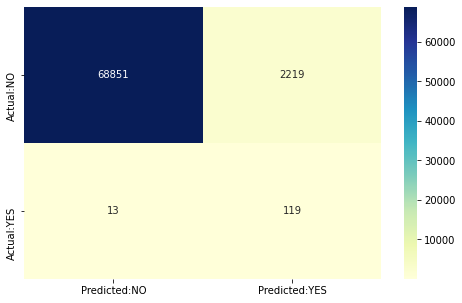

In [29]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:NO','Predicted:YES'],index=['Actual:NO','Actual:YES'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [30]:
print(accuracy_score(y_test,y_pred))

0.968652565939159


In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71070
           1       0.05      0.90      0.10       132

    accuracy                           0.97     71202
   macro avg       0.53      0.94      0.54     71202
weighted avg       1.00      0.97      0.98     71202



c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.54320615        nan 0.54594699        nan 0.53942548
        nan 0.54117878        nan 0.54162306]
  warnings.warn(
c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-

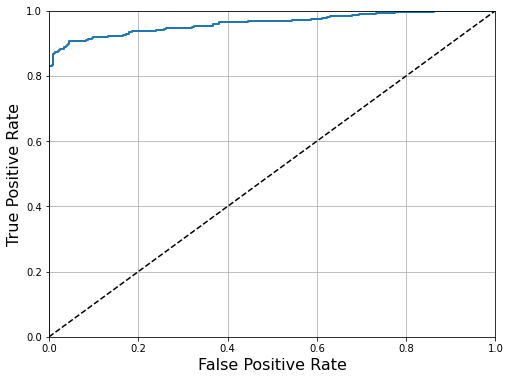

In [32]:
draw_roc_curve(classifier_LR, X_train_under_lr, y_train_under_lr, label = None)

# Logistic Regression with Over Sampling

In [33]:
o_sample_lr = RandomOverSampler(sampling_strategy=0.8)
X_train_over_lr,y_train_over_lr = o_sample_lr.fit_resample(X_train , y_train)

In [34]:
classifier_LR=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
classifier_LR.fit(X_train_over_lr,y_train_over_lr)

c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.58220519        nan 0.58192605        nan 0.58204904
        nan 0.58237197        nan 0.58251995]
  warnings.warn(
c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [35]:
y_pred=classifier_LR.predict(X_test)

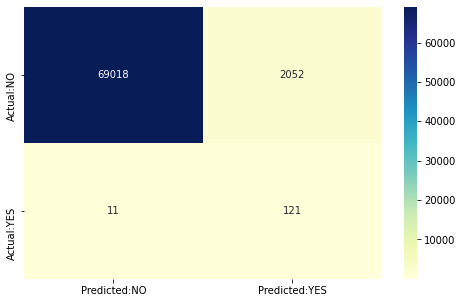

In [36]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:NO','Predicted:YES'],index=['Actual:NO','Actual:YES'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [37]:
print(accuracy_score(y_test,y_pred))

0.9710260947726187


In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71070
           1       0.06      0.92      0.10       132

    accuracy                           0.97     71202
   macro avg       0.53      0.94      0.55     71202
weighted avg       1.00      0.97      0.98     71202



c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.56940088        nan 0.56371477        nan 0.5695374
        nan 0.57036925        nan 0.57019738]
  warnings.warn(
c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.5927765         nan 0.59273763        nan 0.59112611
        nan 0.59215707        nan 0.59145365]
  warnings.warn(
c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.58788552        nan 0.58506135        nan 0.58027406
        nan 0.58027406        nan 0.58027406]
  warnings.warn(


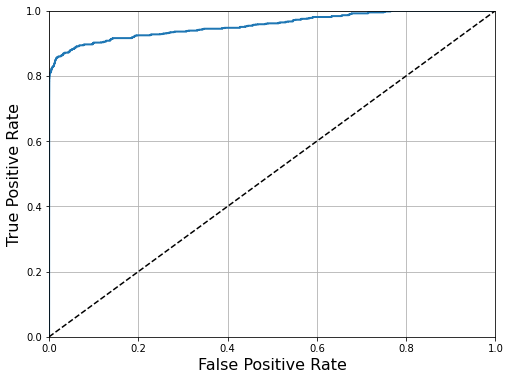

In [39]:
draw_roc_curve(classifier_LR, X_train_over_lr, y_train_over_lr, label = None)

# Random Forest with Under Sampling

Let's find out the best strategy for sampling

In [40]:

t0=time.time()
k=0.5
while k<=1:
    u_sample = RandomUnderSampler(sampling_strategy=k)
    X_train_under,y_train_under = u_sample.fit_resample(X_train,y_train)
    c0=X_train_under[y_train_under==0]
    c1=X_train_under[y_train_under==1]
    print(len(c0),len(c1))
    classifier=RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=1)
    classifier.fit(X_train_under,y_train_under)
    #adap=RandomForestClassifier(n_estimators=10)
    #adap=AdaBoostClassifier(base_estimator=clfsm,n_estimators=10)
    #adap.fit(Xtrsm,ytrsm)
    pred=classifier.predict(X_test)
    print("K=",k)
    print("\nCONFUSION METRICS\n",confusion_matrix(y_test,pred))
    print("\nCLASSIFICATION REPORT\n",classification_report(y_test,pred))
    tn=time.time()-t0
    print(tn)
    print("-"*100)
    k=k+0.1

720 360
K= 0.5

CONFUSION METRICS
 [[70631   439]
 [   17   115]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     71070
           1       0.21      0.87      0.34       132

    accuracy                           0.99     71202
   macro avg       0.60      0.93      0.67     71202
weighted avg       1.00      0.99      1.00     71202

2.625581741333008
----------------------------------------------------------------------------------------------------
600 360
K= 0.6

CONFUSION METRICS
 [[69866  1204]
 [   17   115]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     71070
           1       0.09      0.87      0.16       132

    accuracy                           0.98     71202
   macro avg       0.54      0.93      0.57     71202
weighted avg       1.00      0.98      0.99     71202

5.013194561004639
-----------------------------

So k = 0.7 is the best strategy because we want to keep the false negative as minimum as possible.

In [41]:
u_sample_rf = RandomUnderSampler(sampling_strategy=0.7)
X_train_under_rf,y_train_under_rf = u_sample_rf.fit_resample(X_train,y_train)
    
classifier_RF=RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=1)
classifier_RF.fit(X_train_under_rf,y_train_under_rf)

RandomForestClassifier(max_depth=10, min_samples_split=5)

In [42]:
y_pred=classifier_RF.predict(X_test)

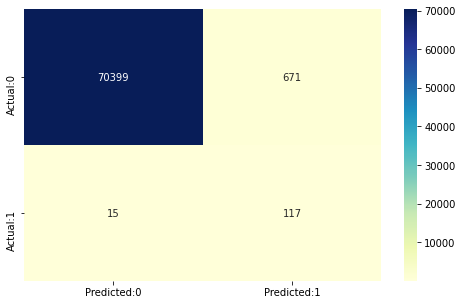

In [43]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [44]:
print(accuracy_score(y_test,y_pred))

0.990365439173057


In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71070
           1       0.15      0.89      0.25       132

    accuracy                           0.99     71202
   macro avg       0.57      0.94      0.62     71202
weighted avg       1.00      0.99      0.99     71202



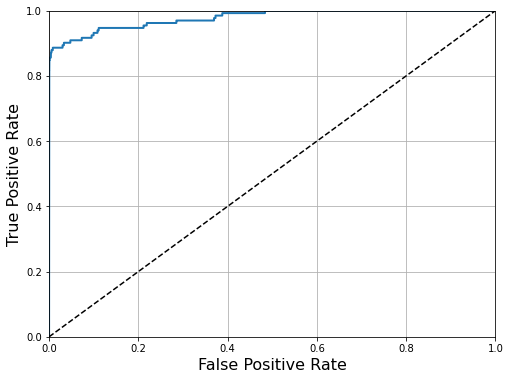

In [46]:
draw_roc_curve_RF(classifier_RF, X_test, y_test, label = None)

# Random Forest with SMOTE

In [47]:
t0=time.time()
k=0.5
while k<=1:
    o_sample = SMOTE(sampling_strategy=k)
    X_train_over,y_train_over = o_sample.fit_resample(X_train,y_train)
    c0=X_train_over[y_train_over==0]
    c1=X_train_over[y_train_over==1]
    print(len(c0),len(c1))
    classifier=RandomForestClassifier(n_estimators = 10)
    classifier.fit(X_train_over,y_train_over)
    #adap=RandomForestClassifier(n_estimators=10)
    #adap=AdaBoostClassifier(base_estimator=clfsm,n_estimators=10)
    #adap.fit(Xtrsm,ytrsm)
    pred=classifier.predict(X_test)
    print("K=",k)
    print("\nCONFUSION METRICS\n",confusion_matrix(y_test,pred))
    print("\nCLASSIFICATION REPORT\n",classification_report(y_test,pred))
    tn=time.time()-t0
    print(tn)
    print("-"*100)
    k=k+0.1

213245 106622
K= 0.5

CONFUSION METRICS
 [[71043    27]
 [   23   109]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.80      0.83      0.81       132

    accuracy                           1.00     71202
   macro avg       0.90      0.91      0.91     71202
weighted avg       1.00      1.00      1.00     71202

49.32749366760254
----------------------------------------------------------------------------------------------------
213245 127947
K= 0.6

CONFUSION METRICS
 [[71048    22]
 [   23   109]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.83      0.83      0.83       132

    accuracy                           1.00     71202
   macro avg       0.92      0.91      0.91     71202
weighted avg       1.00      1.00      1.00     71202

106.42424082756042
----------------

Here the best strategy is k = 0.79

In [48]:
o_sample_rf = SMOTE(sampling_strategy=0.79, random_state=4002)
X_train_over_rf,y_train_over_rf = o_sample_rf.fit_resample(X_train,y_train)
    
classifier_RF=RandomForestClassifier(n_estimators = 10)
classifier_RF.fit(X_train_over_rf,y_train_over_rf)

RandomForestClassifier(n_estimators=10)

In [49]:
y_pred=classifier_RF.predict(X_test)

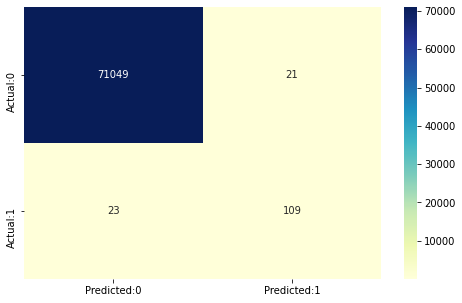

In [50]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [51]:
print(accuracy_score(y_test,y_pred))

0.9993820398303418


In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.84      0.83      0.83       132

    accuracy                           1.00     71202
   macro avg       0.92      0.91      0.92     71202
weighted avg       1.00      1.00      1.00     71202



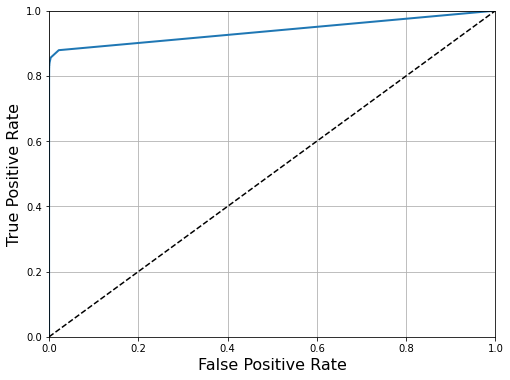

In [53]:
draw_roc_curve_RF(classifier_RF, X_test, y_test, label = None)

# XGBoost with Undersampling

In [54]:
t0=time.time()
k=0.5
while k<=1:
    u_sample = RandomUnderSampler(sampling_strategy=k)
    X_train_under,y_train_under = u_sample.fit_resample(X_train,y_train)
    c0=X_train_under[y_train_under==0]
    c1=X_train_under[y_train_under==1]
    print(len(c0),len(c1))
    classifier=XGBClassifier()
    classifier.fit(X_train_under,y_train_under)
    #adap=RandomForestClassifier(n_estimators=10)
    #adap=AdaBoostClassifier(base_estimator=clfsm,n_estimators=10)
    #adap.fit(Xtrsm,ytrsm)
    pred=classifier.predict(X_test)
    print("K=",k)
    print("\nCONFUSION METRICS\n",confusion_matrix(y_test,pred))
    print("\nCLASSIFICATION REPORT\n",classification_report(y_test,pred))
    tn=time.time()-t0
    print(tn)
    print("-"*100)
    k=k+0.1

720 360
[22:33:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


K= 0.5

CONFUSION METRICS
 [[69732  1338]
 [   16   116]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     71070
           1       0.08      0.88      0.15       132

    accuracy                           0.98     71202
   macro avg       0.54      0.93      0.57     71202
weighted avg       1.00      0.98      0.99     71202

0.8243198394775391
----------------------------------------------------------------------------------------------------
600 360
[22:33:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


K= 0.6

CONFUSION METRICS
 [[69775  1295]
 [   16   116]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     71070
           1       0.08      0.88      0.15       132

    accuracy                           0.98     71202
   macro avg       0.54      0.93      0.57     71202
weighted avg       1.00      0.98      0.99     71202

1.5921218395233154
----------------------------------------------------------------------------------------------------
514 360
[22:33:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


K= 0.7

CONFUSION METRICS
 [[69403  1667]
 [   13   119]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     71070
           1       0.07      0.90      0.12       132

    accuracy                           0.98     71202
   macro avg       0.53      0.94      0.56     71202
weighted avg       1.00      0.98      0.99     71202

2.3279597759246826
----------------------------------------------------------------------------------------------------
450 360
[22:33:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


K= 0.7999999999999999

CONFUSION METRICS
 [[69232  1838]
 [   12   120]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     71070
           1       0.06      0.91      0.11       132

    accuracy                           0.97     71202
   macro avg       0.53      0.94      0.55     71202
weighted avg       1.00      0.97      0.99     71202

3.0696771144866943
----------------------------------------------------------------------------------------------------
400 360
[22:33:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


K= 0.8999999999999999

CONFUSION METRICS
 [[69078  1992]
 [   14   118]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     71070
           1       0.06      0.89      0.11       132

    accuracy                           0.97     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.97      0.98     71202

3.777104139328003
----------------------------------------------------------------------------------------------------
360 360
[22:33:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


K= 0.9999999999999999

CONFUSION METRICS
 [[68395  2675]
 [   13   119]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     71070
           1       0.04      0.90      0.08       132

    accuracy                           0.96     71202
   macro avg       0.52      0.93      0.53     71202
weighted avg       1.00      0.96      0.98     71202

4.487150430679321
----------------------------------------------------------------------------------------------------


In [55]:
u_sample_xg = RandomUnderSampler(sampling_strategy=0.7)
X_train_under_xg,y_train_under_xg = u_sample_xg.fit_resample(X_train,y_train)
    
classifier_XG=XGBClassifier()
classifier_XG.fit(X_train_under_xg,y_train_under_xg)

[22:33:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
y_pred=classifier_XG.predict(X_test)

c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


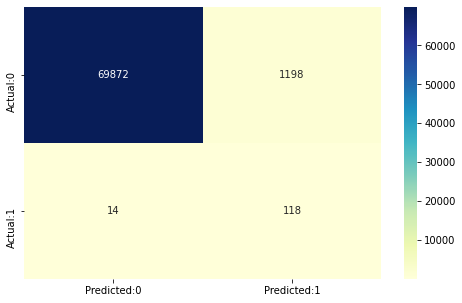

In [57]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [58]:
print(accuracy_score(y_test,y_pred))

0.9829780062357799


In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71070
           1       0.09      0.89      0.16       132

    accuracy                           0.98     71202
   macro avg       0.54      0.94      0.58     71202
weighted avg       1.00      0.98      0.99     71202



c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


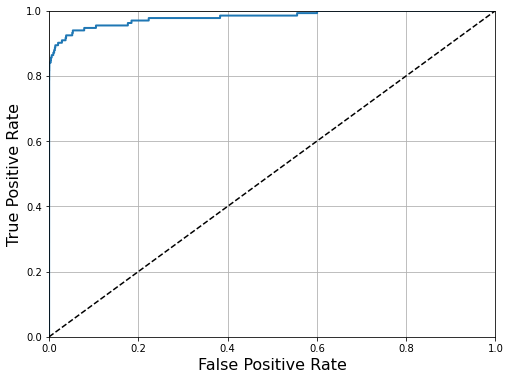

In [60]:
draw_roc_curve_RF(classifier_XG, X_test, y_test, label = None)

# XGBoost with SMOTE

In [61]:
t0=time.time()
k=0.5
while k<=1:
    o_sample = SMOTE(sampling_strategy=k)
    X_train_over,y_train_over = o_sample.fit_resample(X_train,y_train)
    c0=X_train_over[y_train_over==0]
    c1=X_train_over[y_train_over==1]
    print(len(c0),len(c1))
    classifier=XGBClassifier()
    classifier.fit(X_train_over,y_train_over)
    #adap=RandomForestClassifier(n_estimators=10)
    #adap=AdaBoostClassifier(base_estimator=clfsm,n_estimators=10)
    #adap.fit(Xtrsm,ytrsm)
    pred=classifier.predict(X_test)
    print("K=",k)
    print("\nCONFUSION METRICS\n",confusion_matrix(y_test,pred))
    print("\nCLASSIFICATION REPORT\n",classification_report(y_test,pred))
    tn=time.time()-t0
    print(tn)
    print("-"*100)
    k=k+0.1

213245 106622


c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:34:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


K= 0.5

CONFUSION METRICS
 [[71051    19]
 [   22   110]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.85      0.83      0.84       132

    accuracy                           1.00     71202
   macro avg       0.93      0.92      0.92     71202
weighted avg       1.00      1.00      1.00     71202

127.16303133964539
----------------------------------------------------------------------------------------------------
213245 127947


c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


K= 0.6

CONFUSION METRICS
 [[71044    26]
 [   22   110]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.81      0.83      0.82       132

    accuracy                           1.00     71202
   macro avg       0.90      0.92      0.91     71202
weighted avg       1.00      1.00      1.00     71202

265.81406474113464
----------------------------------------------------------------------------------------------------
213245 149271


c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:38:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


K= 0.7

CONFUSION METRICS
 [[71047    23]
 [   22   110]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.83      0.83      0.83       132

    accuracy                           1.00     71202
   macro avg       0.91      0.92      0.91     71202
weighted avg       1.00      1.00      1.00     71202

403.27830839157104
----------------------------------------------------------------------------------------------------
213245 170596


c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:40:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


K= 0.7999999999999999

CONFUSION METRICS
 [[71046    24]
 [   21   111]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.82      0.84      0.83       132

    accuracy                           1.00     71202
   macro avg       0.91      0.92      0.92     71202
weighted avg       1.00      1.00      1.00     71202

542.311989068985
----------------------------------------------------------------------------------------------------
213245 191920


c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:43:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


K= 0.8999999999999999

CONFUSION METRICS
 [[71045    25]
 [   21   111]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.82      0.84      0.83       132

    accuracy                           1.00     71202
   macro avg       0.91      0.92      0.91     71202
weighted avg       1.00      1.00      1.00     71202

689.7621500492096
----------------------------------------------------------------------------------------------------
213245 213244


c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:45:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


K= 0.9999999999999999

CONFUSION METRICS
 [[71047    23]
 [   22   110]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.83      0.83      0.83       132

    accuracy                           1.00     71202
   macro avg       0.91      0.92      0.91     71202
weighted avg       1.00      1.00      1.00     71202

852.3219845294952
----------------------------------------------------------------------------------------------------


In [62]:
o_sample_xg = SMOTE(sampling_strategy=0.5, random_state=4003)
X_train_over_xg,y_train_over_xg = o_sample_xg.fit_resample(X_train,y_train)
    
classifier_XG=XGBClassifier()
classifier_XG.fit(X_train_over_xg,y_train_over_xg)

c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:48:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
y_pred=classifier_XG.predict(X_test)

c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


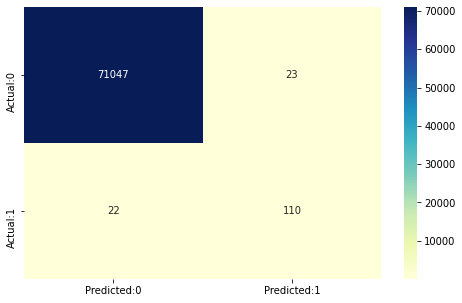

In [64]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [65]:
print(accuracy_score(y_test,y_pred))

0.9993679952810315


In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.83      0.83      0.83       132

    accuracy                           1.00     71202
   macro avg       0.91      0.92      0.91     71202
weighted avg       1.00      1.00      1.00     71202



c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


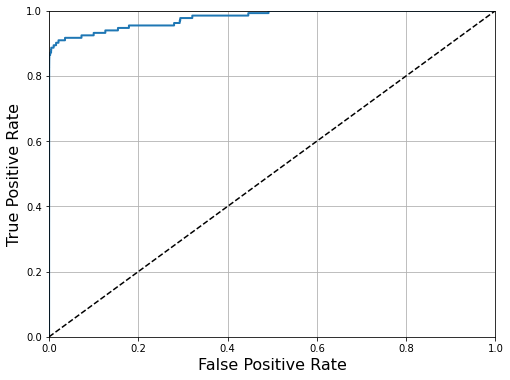

In [67]:
draw_roc_curve_RF(classifier_XG, X_test, y_test, label = None)

# Using ROC & AUC Curve to select the best model

In [68]:

clf_lr=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
model_lr = clf_lr.fit(X_train_over_lr,y_train_over_lr)
probs_lr = model_lr.predict_proba(X_test)[:, 1]

model_rf = RandomForestClassifier(n_estimators = 10).fit(X_train_over_rf,y_train_over_rf)
probs_rf = model_rf.predict_proba(X_test)[:, 1]

model_xg = XGBClassifier().fit(X_train_over_xg,y_train_over_xg)
probs_xg = model_xg.predict_proba(X_test)[:, 1]

c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.58220519        nan 0.58192605        nan 0.58204904
        nan 0.58237197        nan 0.58251995]
  warnings.warn(
c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecate

[22:52:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ar\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


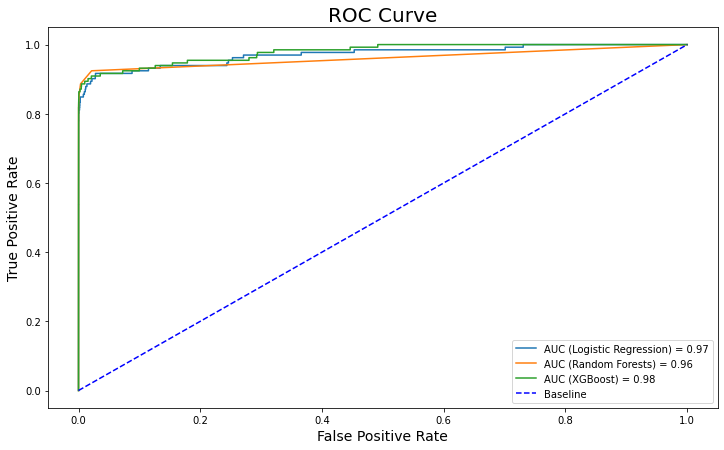

In [69]:
auc_lr = roc_auc_score(y_test, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, probs_lr)

auc_rf = roc_auc_score(y_test, probs_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, probs_rf)

auc_xg = roc_auc_score(y_test, probs_xg)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test, probs_xg)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_xg, tpr_xg, label=f'AUC (XGBoost) = {auc_xg:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

## From the above AUC Curve and ROC value, we can say that the XGBoost model is best trained model for this dataset!